# Predicting Student's Academic Performance For University

## Load Import necessary Libraries/ Dependencies

In [1]:
!pip install xgboost 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from plotly import tools
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

### Load and Read Datasets

In [3]:
data = pd.read_csv('xAPI-Edu-Data.csv')
# Any results you write to the current directory are saved as output.
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<b><p>Attributes</p></b>
1 Gender - student's gender (nominal: 'Male' or 'Female’)

2 Nationality- student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

3 Place of birth- student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’ Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)

4 Educational Stages- educational level student belongs (nominal: ‘lowerlevel’,’MiddleSchool’,’HighSchool’)

5 Grade Levels- grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)

6 Section ID- classroom student belongs (nominal:’A’,’B’,’C’)

7 Topic- course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)

8 Semester- school year semester (nominal:’ First’,’ Second’)

9 Parent responsible for student (nominal:’mom’,’father’)

10 Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)

11- Visited resources- how many times the student visits a course content(numeric:0-100)

12 Viewing announcements-how many times the student checks the new announcements(numeric:0-100)

13 Discussion groups- how many times the student participate on discussion groups (numeric:0-100)

14 Parent Answering Survey- parent answered the surveys which are provided from school or not (nominal:’Yes’,’No’)

15 Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Yes’,’No’)

16 Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

# DataSets Describe 

In [4]:
data.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


# Check DataSets Shape 

In [5]:
print(data.shape)

(480, 17)


# Check DataSets Columns

In [6]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

# Check Missing Data

In [7]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Gender  Value Counts & Percentage  In Dataset

In [8]:
data['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<AxesSubplot:>

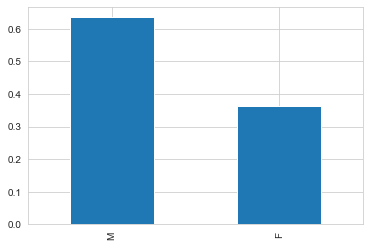

In [9]:
print('Percentage',data.gender.value_counts(normalize=True))
data.gender.value_counts(normalize=True).plot(kind='bar')

# NationalITy  Value Counts & Percentage  In Dataset

In [10]:
data['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<AxesSubplot:>

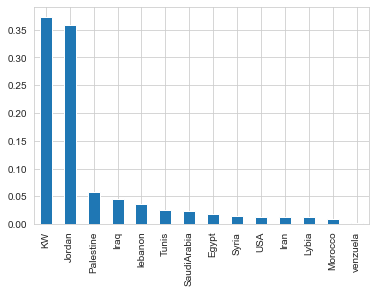

In [11]:
print('Percentage',data.NationalITy.value_counts(normalize=True))
data.NationalITy.value_counts(normalize=True).plot(kind='bar')

# PlaceofBirth Value Counts & Percentage In Dataset

In [12]:
data['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<AxesSubplot:>

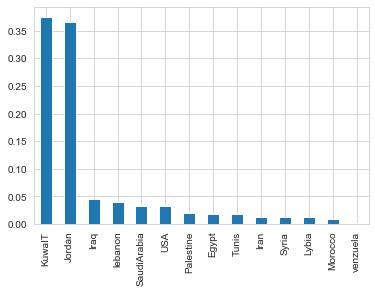

In [13]:
print('Percentage',data.PlaceofBirth.value_counts(normalize=True))
data.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

*  <b>  Most of these countries are in the middle east(Islamic states), perhaps this explains the gender disparity </b>

# StageID  Value Counts & Percentage In Dataset

In [14]:
data['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Percentage MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<AxesSubplot:>

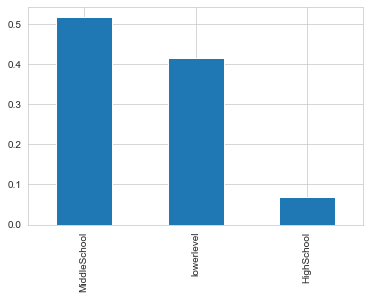

In [15]:
print('Percentage',data.StageID.value_counts(normalize=True))
data.StageID.value_counts(normalize=True).plot(kind='bar')

# GradeID  Value Counts & Percentage  In Dataset

In [16]:
data['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

Percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<AxesSubplot:>

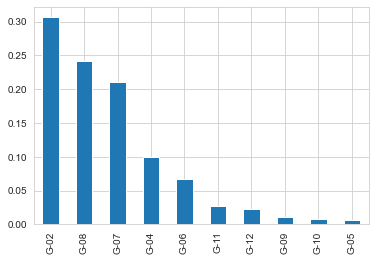

In [17]:
print('Percentage',data.GradeID.value_counts(normalize=True))
data.GradeID.value_counts(normalize=True).plot(kind='bar')

# Topic Value Counts & Parcentage In Dataset

In [18]:
data['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<AxesSubplot:>

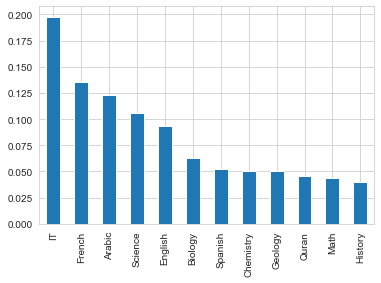

In [19]:
print('Percentage',data.Topic.value_counts(normalize=True))
data.Topic.value_counts(normalize=True).plot(kind='bar')

# Semester Value Counts & Parcentage In Dataset

In [20]:
data['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Parcentage F    0.510417
S    0.489583
Name: Semester, dtype: float64


<AxesSubplot:>

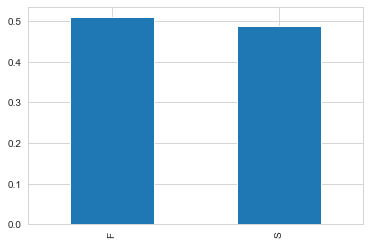

In [21]:
print('Parcentage',data.Semester.value_counts(normalize=True))
data.Semester.value_counts(normalize=True).plot(kind='bar')

# Relation Value Counts & Parcentage In Dataset

In [22]:
data['Relation'].value_counts()

Father    283
Mum       197
Name: Relation, dtype: int64

Parcentage Father    0.589583
Mum       0.410417
Name: Relation, dtype: float64


<AxesSubplot:>

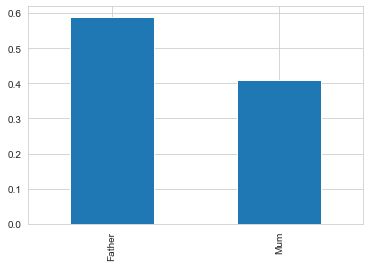

In [23]:
print('Parcentage',data.Relation.value_counts(normalize=True))
data.Relation.value_counts(normalize=True).plot(kind='bar')

# Raisedhands Value Counts & Parcentage In Dataset

In [24]:
data['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

# ParentschoolSatisfaction Value Counts & Parcentage In Dataset

In [25]:
data['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

Parcentage Good    0.608333
Bad     0.391667
Name: ParentschoolSatisfaction, dtype: float64


<AxesSubplot:>

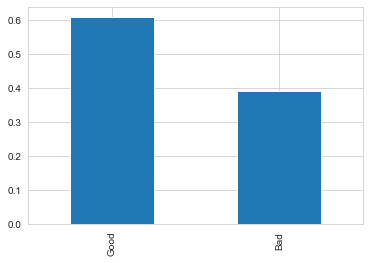

In [26]:
print('Parcentage',data.ParentschoolSatisfaction.value_counts(normalize=True))
data.ParentschoolSatisfaction.value_counts(normalize=True).plot(kind='bar')

# ParentAnsweringSurvey Value Counts & Parcentage In Dataset

In [27]:
data['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Parcentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<AxesSubplot:>

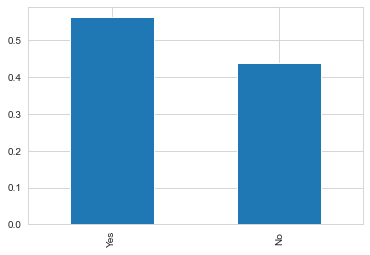

In [28]:
print('Parcentage',data.ParentAnsweringSurvey.value_counts(normalize=True))
data.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

# StudentAbsenceDays Value Counts & Parcentage In Dataset

In [29]:
data['StudentAbsenceDays'].value_counts()

Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64

Parcentage Under-7    0.602083
Above-7    0.397917
Name: StudentAbsenceDays, dtype: float64


<AxesSubplot:>

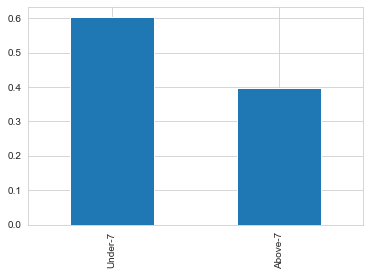

In [30]:
print('Parcentage',data.StudentAbsenceDays.value_counts(normalize=True))
data.StudentAbsenceDays.value_counts(normalize=True).plot(kind='bar')

# Class Value Counts & Parcentage In Dataset

In [31]:
data['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Parcentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<AxesSubplot:>

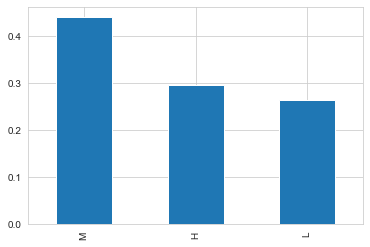

In [32]:
print('Parcentage',data.Class.value_counts(normalize=True))
data.Class.value_counts(normalize=True).plot(kind='bar')

* <p>Girls seem to have performed better than boys
* Girls had much better attendance than boys</p>

* <p><b>I'll start with visualizing just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what I can deduce from that.</p></b>

<AxesSubplot:xlabel='Semester', ylabel='count'>

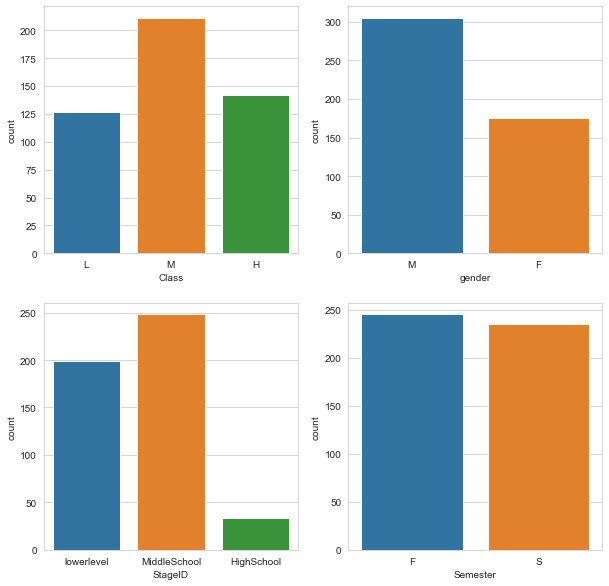

In [33]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

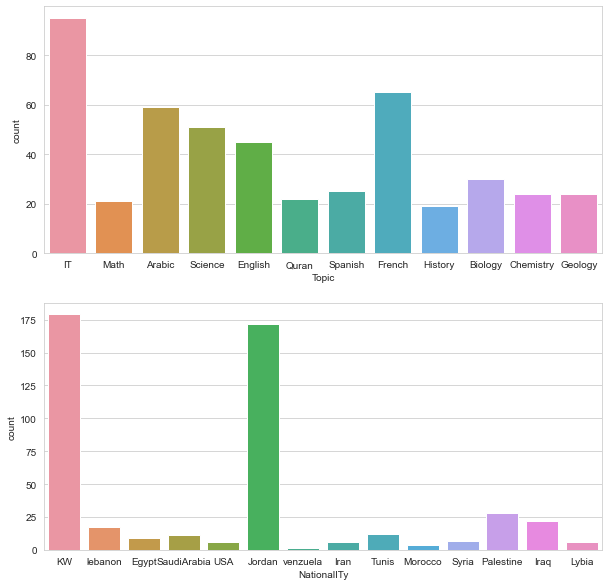

In [34]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

* <p><b>Next I will look at some categorical features in relation to each other, to see what insights that could possibly read</p></b>

<AxesSubplot:xlabel='gender', ylabel='count'>

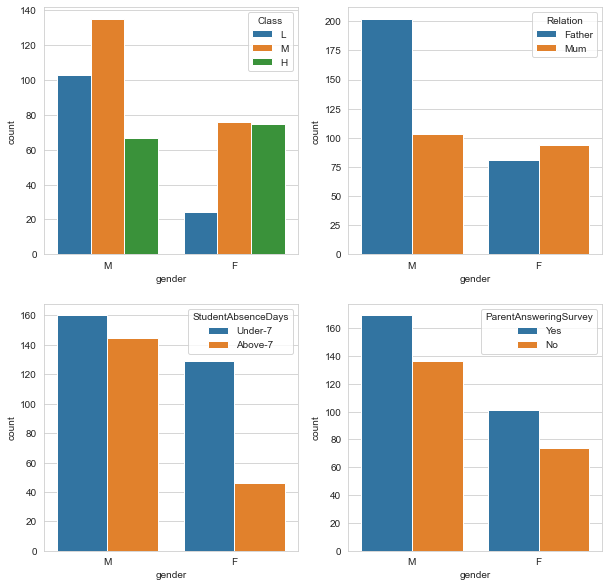

In [35]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

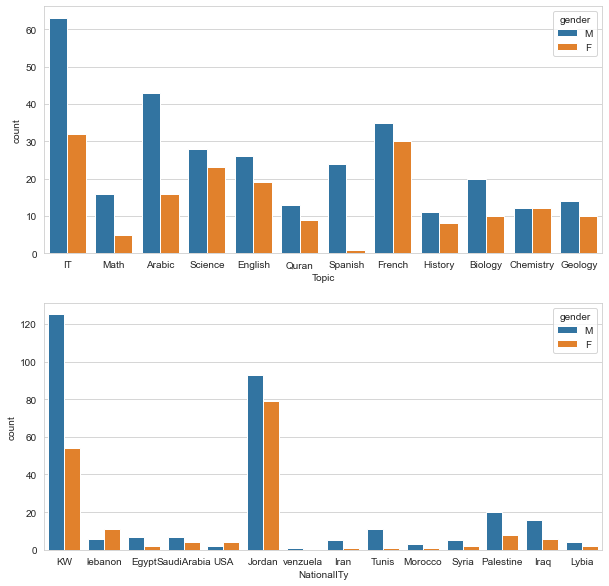

In [36]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)

* <p> <b> No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects
* Gender disparity holds even at a country level. May just be as a result of the sampling.</p></b>

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

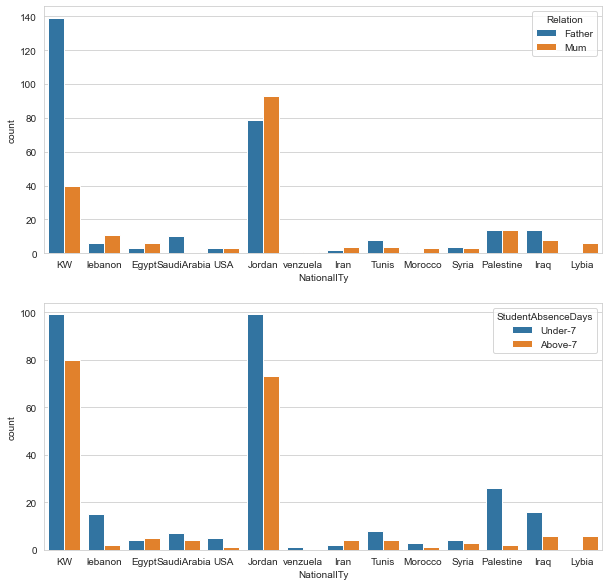

In [37]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='NationalITy', hue='Relation', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=data, ax=axis2)


## Now I am moving on to visualizing categorical features with numerical features. 


<AxesSubplot:xlabel='Class', ylabel='Discussion'>

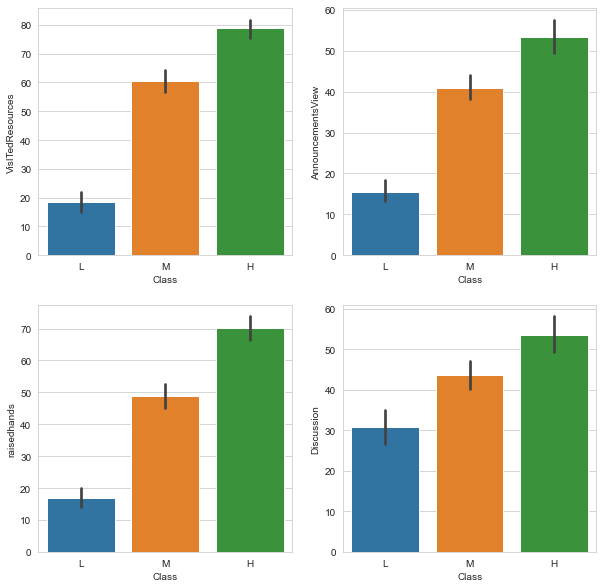

In [38]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

* <p><b>As expected, those that participated more (higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better ...that thing about correlation and causation.</p></b>

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

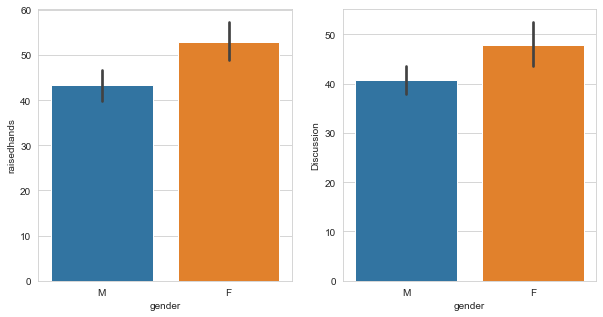

In [39]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', data=data, ax=axis1)
sns.barplot(x='gender', y='Discussion', data=data, ax=axis2)

## There are various other plots that help visualize Categorical vs Numerical data better.

<AxesSubplot:xlabel='gender', ylabel='raisedhands'>

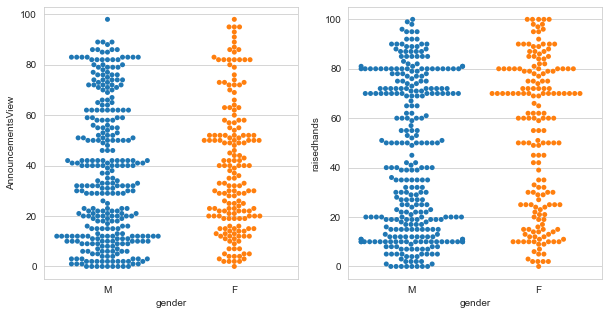

In [40]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.swarmplot(x='gender', y='AnnouncementsView', data=data, ax=axis1)
sns.swarmplot(x='gender', y='raisedhands', data=data, ax=axis2)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

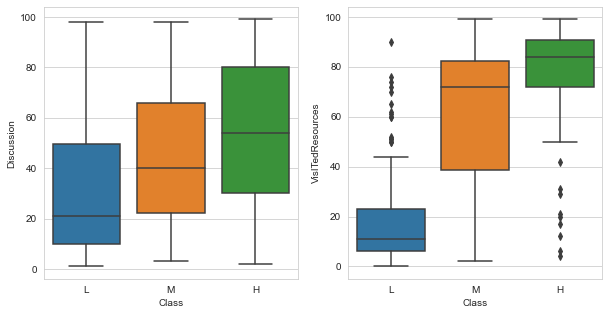

In [41]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.boxplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axis1)
sns.boxplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axis2)

* <p> The two plots above tell us that visiting the resources may not be as sure a path to performing well as discussions<p>

<AxesSubplot:xlabel='Semester', ylabel='AnnouncementsView'>

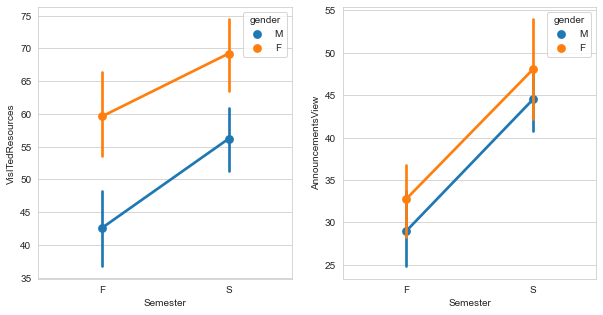

In [42]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

* <p>In the case of both visiting resources and viewing announcements, students were more vigilant in the second semester, perhaps that last minute need to boost your final grade.</p>

## Moving on to plots to visualize relationships between numerical features.

<AxesSubplot:xlabel='AnnouncementsView', ylabel='Discussion'>

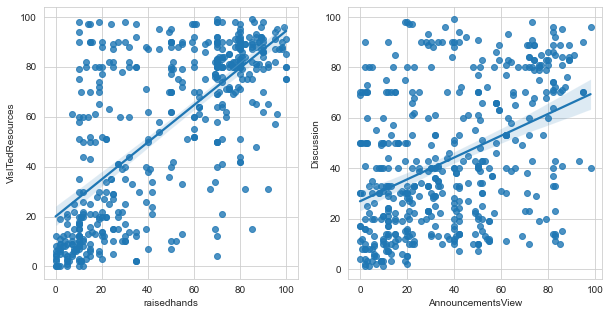

In [43]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.regplot(x='raisedhands', y='VisITedResources', data=data, ax=axis1)
sns.regplot(x='AnnouncementsView', y='Discussion', data=data, ax=axis2)

## Gender Comparison With Parents Relationship

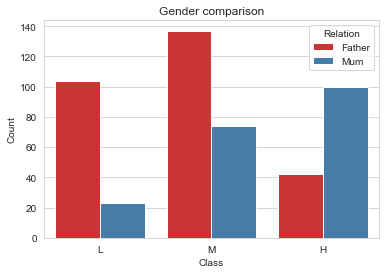

In [44]:
plot = sns.countplot(x='Class', hue='Relation', data=data, order=['L', 'M', 'H'], palette='Set1')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison')
plt.show()

## Pairplot

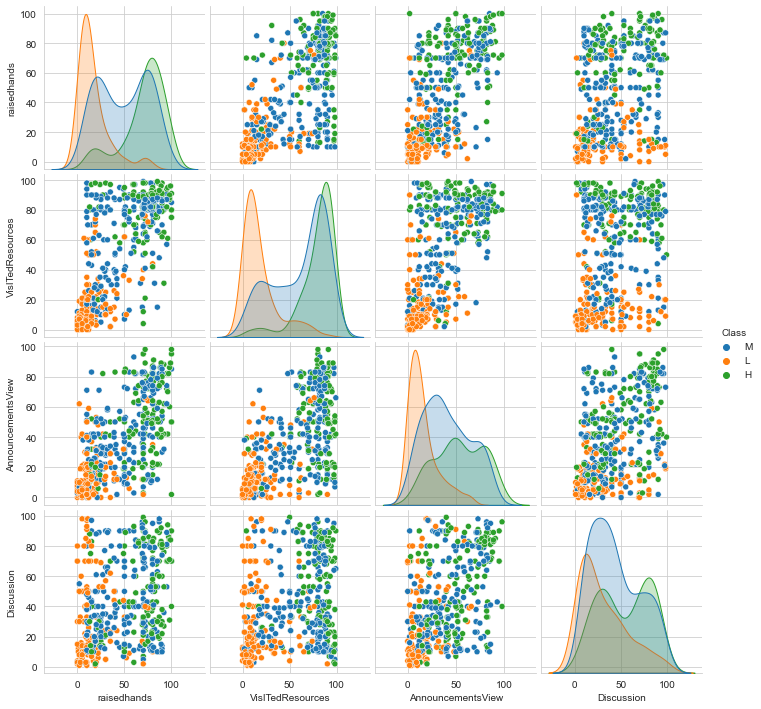

In [45]:
sns.pairplot(data,hue='Class')

## Graph Analysis Gender vs Place of Birth

Graph with 16 nodes and 26 edges


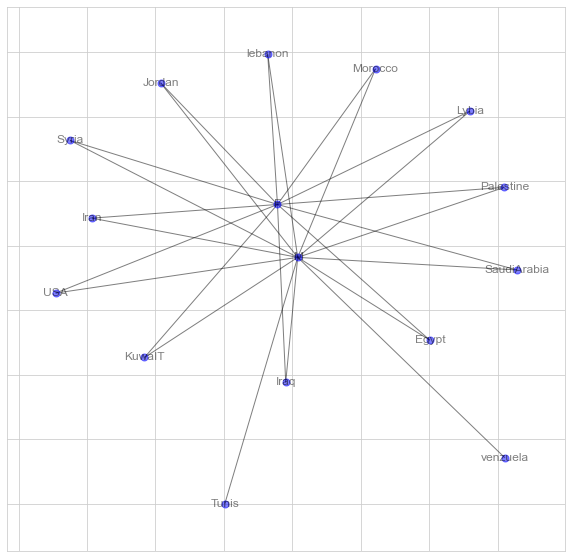

In [48]:
import warnings 
warnings.filterwarnings('ignore')
import networkx as nx

g= nx.Graph()
edge_list = data[['gender',"PlaceofBirth"]].values.tolist()
g = nx.from_edgelist(edge_list)
print (nx.info(g))


plt.figure(figsize=(10,10)) 
nx.draw_networkx(g,with_labels=True,node_size=50, alpha=0.5, node_color="blue")
plt.show()

 # 2. Machine Learning Algorithm  applying:

## Label Encoding 

<p><b>1.Gender Encoding

In [49]:
Features = data.drop('gender',axis=1)
Target = data['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])
    

<p><b>2.Semester Encoding

In [50]:
Features = data.drop('Semester',axis=1)
Target = data['Semester']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>3.ParentAnsweringSurvey Encoding

In [51]:
Features = data.drop('ParentAnsweringSurvey',axis=1)
Target = data['ParentAnsweringSurvey']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>4.Relation Encoding 

In [52]:
Features = data.drop('Relation',axis=1)
Target = data['Relation']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>5.ParentschoolSatisfaction Encoding

In [53]:
Features = data.drop('ParentschoolSatisfaction',axis=1)
Target = data['ParentschoolSatisfaction']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>6.StudentAbsenceDays Encoding

In [54]:
Features = data.drop('StudentAbsenceDays',axis=1)
Target = data['StudentAbsenceDays']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

<p><b>7.Class Encoding

In [55]:
Features = data.drop('Class',axis=1)
Target = data['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

## Test and Train Data Split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

## Logistic Regression Model

In [57]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

<p><b>Logistic Regression's Prediction,Score & Report

In [58]:
Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

In [59]:
print(Prediction)

['L' 'M' 'L' 'L' 'M' 'L' 'M' 'H' 'M' 'M' 'M' 'L' 'M' 'L' 'M' 'L' 'H' 'M'
 'M' 'M' 'H' 'H' 'L' 'L' 'H' 'L' 'M' 'H' 'H' 'M' 'M' 'H' 'L' 'M' 'M' 'L'
 'L' 'L' 'H' 'L' 'M' 'M' 'M' 'M' 'H' 'L' 'M' 'L' 'M' 'L' 'H' 'H' 'M' 'M'
 'H' 'M' 'H' 'L' 'L' 'H' 'L' 'H' 'M' 'M' 'H' 'M' 'L' 'L' 'H' 'H' 'H' 'H'
 'H' 'H' 'H' 'H' 'M' 'H' 'M' 'H' 'L' 'H' 'M' 'M' 'L' 'M' 'M' 'M' 'M' 'M'
 'L' 'M' 'M' 'H' 'M' 'H']


In [60]:
print(Score)

0.7916666666666666


In [61]:
print(Report)

              precision    recall  f1-score   support

           H       0.87      0.74      0.80        35
           L       0.77      0.91      0.83        22
           M       0.75      0.77      0.76        39

    accuracy                           0.79        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.80      0.79      0.79        96

